In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
df = pd.DataFrame({
    'x': [2,3,1,1,0,5,4,6,5,3],
    'y': [1,2,2,1,1,3,3,7,6,5]
})
x = df['x'].to_numpy()
y = df['y'].to_numpy()
df

,x,y
0,2,1
1,3,2
2,1,2
3,1,1
4,0,1
5,5,3
6,4,3
7,6,7
8,5,6
9,3,5


In [3]:
p1 = np.poly1d([2,1])
p3 = np.poly1d([2,-1])
p4 = np.poly1d([1,-0.5])
p5 = np.poly1d([1,0.5])
print(p1)

 
2 x + 1


In [4]:
matrix = np.column_stack([x,np.ones(x.shape)])
matrix

array([[2., 1.],
       [3., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [5., 1.],
       [4., 1.],
       [6., 1.],
       [5., 1.],
       [3., 1.]])

In [5]:
matrix@p1

array([ 5.,  7.,  3.,  3.,  1., 11.,  9., 13., 11.,  7.])

In [6]:
print(mean_squared_error(matrix@p1, y))
print(mean_squared_error(x, y))
print(mean_squared_error(matrix@p3, y))
print(mean_squared_error(matrix@p4, y))
print(mean_squared_error(matrix@p5, y))

21.1
1.5
9.5
1.85
1.65


In [7]:
print(mean_absolute_error(matrix@p1, y))
print(mean_absolute_error(x, y))
print(mean_absolute_error(matrix@p3, y))
print(mean_absolute_error(matrix@p4, y))
print(mean_absolute_error(matrix@p5, y))

3.9
1.1
2.5
1.2
1.1


In [8]:
df2 = pd.DataFrame([mean_squared_error(x*0,y),mean_squared_error(x*0.2,y),mean_squared_error(x*0.25,y),
         mean_squared_error(x*0.33,y),mean_squared_error(x*0.5,y),
         mean_squared_error(x,y),mean_squared_error(x*2,y),
         mean_squared_error(x*3,y),mean_squared_error(x*4,y),
         mean_squared_error(x*5,y)],index=[0,0.20,0.25,0.33,0.50,1,2,3,4,5]
)
df2

,0
0.00,13.90000
0.20,9.40400
0.25,8.43750
0.33,7.02214
0.50,4.55000
1.00,1.50000
2.00,14.30000
3.00,52.30000
4.00,115.50000
5.00,203.90000


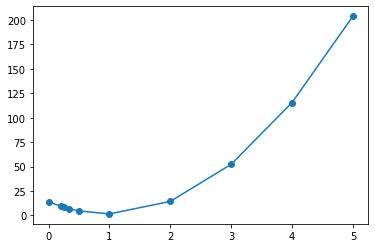

In [9]:
plt.scatter(x=[0,0.20,0.25,0.33,0.50,1,2,3,4,5],y=df2[0])
plt.plot([0,0.20,0.25,0.33,0.50,1,2,3,4,5],df2[0])
plt.show()

In [10]:
df3 = pd.DataFrame([mean_squared_error(x-4,y),mean_squared_error(x-3,y),mean_squared_error(x-2,y),
         mean_squared_error(x-1,y),mean_squared_error(x,y),
         mean_squared_error(x+1,y),mean_squared_error(x+2,y),
         mean_squared_error(x+3,y),mean_squared_error(x+4,y),
         mean_squared_error(x+5,y)],index=[-4,-3,-2,-1,0,1,2,3,4,5]
)
df3

,0
-4,18.3
-3,11.1
-2,5.9
-1,2.7
0,1.5
1,2.3
2,5.1
3,9.9
4,16.7
5,25.5


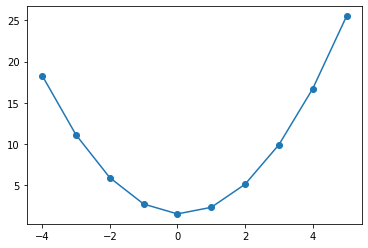

In [11]:
plt.scatter(x=[-4,-3,-2,-1,0,1,2,3,4,5],y=df3[0])
plt.plot([-4,-3,-2,-1,0,1,2,3,4,5],df3[0])
plt.show()

In [12]:
X, Y = np.meshgrid([-4,-3,-2,-1,0,1,2,3,4,5],[0,0.20,0.25,0.33,0.50,1,2,3,4,5])
Y

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ],
       [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
       [0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33],
       [0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ],
       [3.  , 3.  , 3.  , 3.  , 3.  , 3.  , 3.  , 3.  , 3.  , 3.  ],
       [4.  , 4.  , 4.  , 4.  , 4.  , 4.  , 4.  , 4.  , 4.  , 4.  ],
       [5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  ]])

In [13]:
def Zmaker(arr1,arr2):
    arr = []
    for x in arr1:
        for y in arr2:
            p = np.poly1d([x,y])
            y_pred = p(df['x'])
            #print(y_pred)
            #print(mean_squared_error(df['y'],y_pred))
            arr.append(mean_squared_error(df['y'],y_pred))
    return np.array([arr]).reshape(10,10)
            
Z = Zmaker([0,0.20,0.25,0.33,0.50,1,2,3,4,5],[-4,-3,-2,-1,0,1,2,3,4,5])

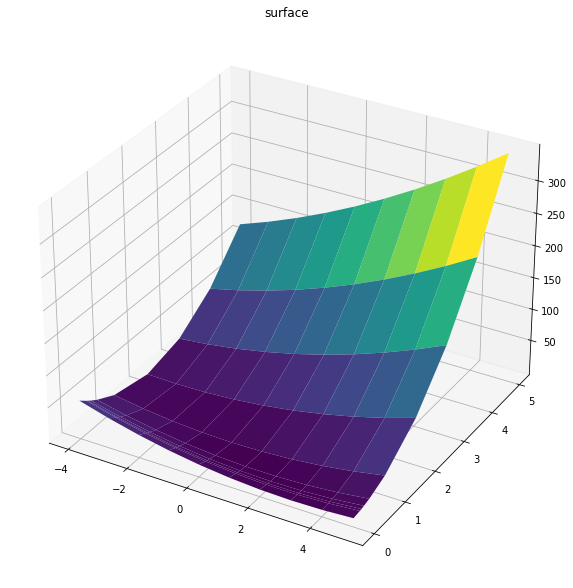

In [14]:
fig = plt.figure(figsize=(10,15))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [15]:
w = np.polyfit(df['x'],df['y'],1)
p = np.poly1d(w)
y_pred = p(df['x'])
mean_squared_error(df['y'],y_pred)

1.4455555555555555

In [16]:
print(p)

 
0.8889 x + 0.4333
